## Classification data

In [1]:
from fri import genClassificationData
X,y = genClassificationData(n_samples=200, n_features=5,n_strel=2, n_redundant=2,
                    n_repeated=0, flip_y=0,random_state=2)

Generating dataset with d=5,n=200,strongly=2,weakly=2, partition of weakly=None


In [2]:
X.shape

(200, 5)

We created a binary classification set with 6 features of which 2 are strongly relevant and 2 weakly relevant.

Scale Data

In [3]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

New object for Classification Data

In [4]:
from fri import FRIClassification
fri = FRIClassification()

Fit to data

In [5]:
fri.fit(X_scaled,y)

Print out feature relevance intervals

In [6]:
fri.interval_

array([[ 0.36798572,  0.37821986],
       [ 0.14331004,  0.15923453],
       [ 0.        ,  0.48456378],
       [ 0.        ,  0.48456378],
       [ 0.        ,  0.01385291]])

### Plot results

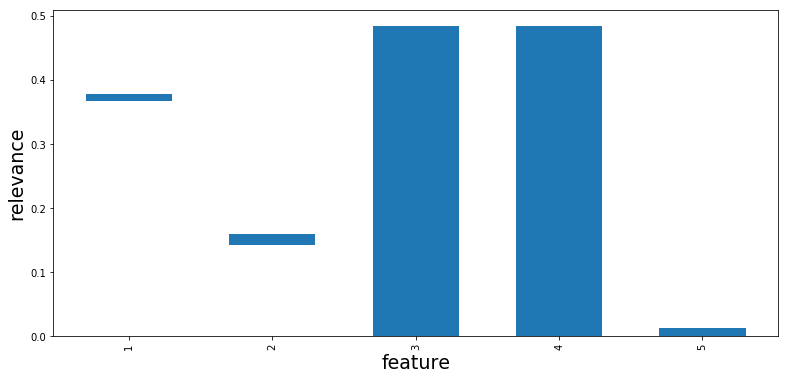

In [7]:
from fri import plot
%matplotlib inline
p = plot.plotIntervals(fri.interval_)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [17]:
fri.community_detection2(X_scaled,y)

In [69]:
def plotbars(bars,names,X,di):
    d = X.shape[1]
    xticks = np.arange(d)
    width = 0.2
    plt.figure(figsize=(8,5))
    plt.title("Dimension {}".format(di))
    
    def plotbar(bar1,name,i):
        upper_vals = bar1[:, 1]
        lower_vals = bar1[:, 0]
        height = upper_vals - lower_vals
        height[height < 0.004] =  0.004
        plt.bar(xticks+i*width,height,width,lower_vals,label=name)
    for bar,name,i in zip(bars,names,range(len(bars))):
        plotbar(bar,name,i)


    plt.axvline(x=di-width/2,linestyle="--")
    plt.axvline(x=di+3/2*width,linestyle="--")
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

IndexError: too many indices for array

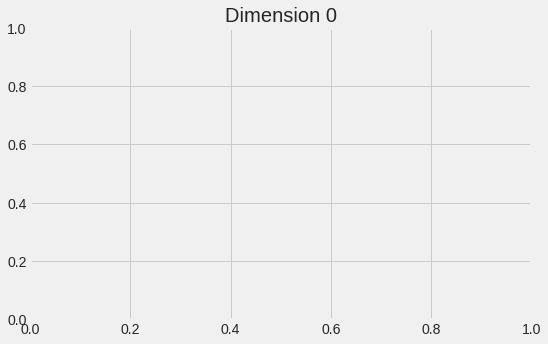

In [71]:
for d in range(X.shape[1]):
    ints = fri.interval_
    conr = fri.conranges
    condiff = fri.conranges_diff
    plotbars([ints[d],conr[d],condiff[d]],["interval","constrained","diff"],X,d)
